# Point source - still not working. calculate everything analytically from the vol back to projected image.

In [1]:
%load_ext autoreload
%autoreload 2
import site
import sys
site.addsitedir('..')

In [2]:
import numpy as np
from  matplotlib import pyplot as plt
from src.utils import *
from src.projection import project, rotate
from src.interpolate import *

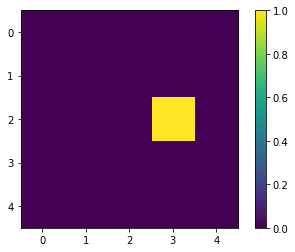

In [75]:
nx = 5
shape = np.array([nx, nx, nx])
dimensions = np.array([1, 1, 1])
radius = 1/(2*nx)
centre = np.array([0.2,0,0])
intensity = 1

v = spherical_volume(shape, dimensions, centre, radius, intensity, False)
plt.imshow(v[:,:,2])
plt.colorbar()

In [76]:
v_f, X_f, Y_f, Z_f, _, _, _ = volume_fourier(v, dimensions)
#plt.imshow(np.real(v_f[:,:,0])); plt.colorbar()

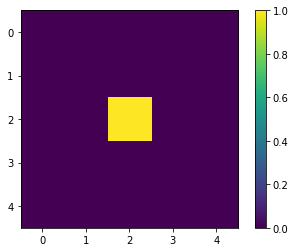

In [78]:
angles = np.array([0,0,np.pi/2])
slice_num, slice_X, slice_Y, slice_Z = project(v_f, X_f, Y_f, Z_f, angles, "nn")

v_fi = np.fft.ifftn(slice_num)
plt.imshow(np.real(v_fi))
plt.colorbar()

In [68]:
np.imag(v_fi)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [55]:
v_fi = np.real(v_fi)
v_fi[v_fi < 1e-14] = 0
v_fi

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

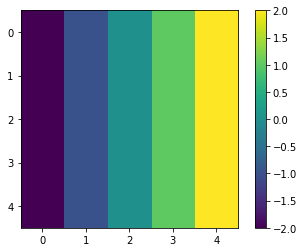

In [7]:
plt.imshow(np.fft.fftshift(X_f[:,:,0])); plt.colorbar()

array([[ 2.0000000e+00,  1.0000000e+00,  2.4492936e-16, -1.0000000e+00,
        -2.0000000e+00],
       [ 2.0000000e+00,  1.0000000e+00,  1.2246468e-16, -1.0000000e+00,
        -2.0000000e+00],
       [ 2.0000000e+00,  1.0000000e+00,  0.0000000e+00, -1.0000000e+00,
        -2.0000000e+00],
       [ 2.0000000e+00,  1.0000000e+00, -1.2246468e-16, -1.0000000e+00,
        -2.0000000e+00],
       [ 2.0000000e+00,  1.0000000e+00, -2.4492936e-16, -1.0000000e+00,
        -2.0000000e+00]])

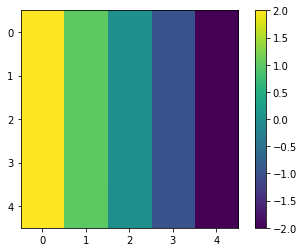

In [8]:
X_fr, _, _ = rotate(X_f, Y_f, Z_f, np.array([0,0,np.pi]))
plt.imshow(np.fft.fftshift(X_fr[:,:,0])); plt.colorbar()
np.fft.fftshift(X_fr[:,:,0])

## The same, analytically

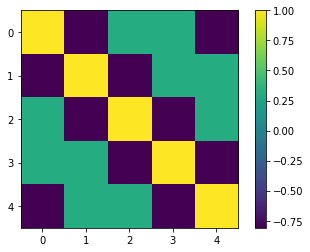

In [9]:
# Fourier transform of a 5 x 5 x 5 cube v with v[3,2,2] = 1 and 0 otherwise.

krange = np.arange(5)
X, Y, Z = np.meshgrid(krange, krange, krange)
V = np.exp(-1j * 2 * np.pi / 5 * (3*X + 2*Y + 2*Z))
plt.imshow(np.real(V[:,:,0])); plt.colorbar()

In [10]:
# And it's the same

np.max(abs(v_f - V))

1.355199909595506e-15

In [11]:
Vi = np.fft.ifftn(V)
np.max(np.imag(Vi))

7.061762682054096e-16

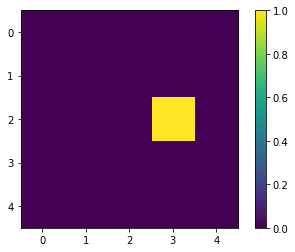

In [12]:
Vi = np.real(Vi)
plt.imshow(Vi[:,:,2]); plt.colorbar()

In [271]:
Vi[Vi < 1e-14] = 0

In [272]:
Vi[:,:,2]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [273]:

Vi[2,3,2]

1.0

In [101]:
Vi[:,3,2]

array([0., 0., 1., 0., 0.])

In [104]:
Vi[2,:,2]

array([0., 0., 0., 1., 0.])

In [160]:
x = np.arange(10)
y = np.arange(10,100,10)
z = np.arange(100,1000,100)

In [166]:
np.array([x,y,z])

/var/folders/lc/3jfnysx1275gg3h_gcdxfgcr0000gn/T/ipykernel_21651/2839497825.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([x,y,z])


array([array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
       array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
       array([100, 200, 300, 400, 500, 600, 700, 800, 900])], dtype=object)

In [176]:
i_coords = np.array([[1,2,3,4,5,6,7],[10,20,30,40,50,60,70],[100,200,300,400,500,600,700]])
x

array([[  1,   2,   3,   4,   5,   6,   7],
       [ 10,  20,  30,  40,  50,  60,  70],
       [100, 200, 300, 400, 500, 600, 700]])

In [178]:
x[0,1]

2